In [22]:
library(data.table)
library(ggplot2)
library(ggpattern)

In [23]:
# assign original colours to cell types
df_colours = data.frame(colours = c("#882E72","#B178A6","#D6C1DE","#1965B0","#5289C7","#7BAFDE","#4EB265",
                                    "#90C987","#CAE0AB","#F7EE55","#F6C141","#F1932D","#E8601C","#DC050C"),
                        celltype = c("CD4_NC","CD4_ET","CD4_SOX4","CD8_ET","CD8_NC","CD8_S100B","NK","NK_R",
                                     "Plasma","B_Mem","B_IN","Mono_C","Mono_NC","DC"))

In [24]:
mydir = "/share/ScratchGeneral/anncuo/OneK1K/saige_eqtl/ms_figures/weis_figures/chisq/"

In [25]:
dataall=NULL
for(celltype in df_colours$celltype){ 
  data = fread(paste0(mydir,"cis_",celltype,"_TensorQTL_topVariant_withSAIGEQTL"), header=T, data.table=F)
  data$celltype = celltype
  dataall = rbind(dataall, data)
}
head(dataall)

,celltype,V1,phenotype_id,num_var,beta_shape1,beta_shape2,true_df,pval_true_df,variant_id,start_distance,⋯,AF_Allele2,MissingRate,BETA,SE,Tstat,var,p.value,p.value.NA,Is.SPA,N
,<chr>,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,CD4_NC,0,C1orf86,3287,1.0582726,244.3626,824.7351,3.539225e-11,1:2110848,-5056,⋯,0.217413,0,-0.115809,0.0148442,-525.571,4538.24,6.9802e-15,6.10905e-15,TRUE,982
2,CD4_NC,1,PARK7,3682,1.0487032,243.3406,795.2192,1.157175e-07,1:8087469,73117,⋯,0.394603,0,0.0696561,0.0101902,670.796,9630.11,8.24631e-12,8.16813e-12,TRUE,982
3,CD4_NC,2,ENO1,3400,1.0615332,270.2530,810.2823,2.730750e-07,1:8910110,-10952,⋯,0.513238,0,0.078225,0.012226,523.333,6690.1,1.5782e-10,1.57161e-10,TRUE,982
4,CD4_NC,3,H6PD,2951,1.0090504,230.6999,810.1854,9.174634e-08,1:9332260,37425,⋯,0.14053,0,0.342028,0.0577268,102.637,300.085,5.822e-09,3.1242e-09,TRUE,982
5,CD4_NC,4,MTHFR,3404,1.0457665,267.5265,817.2780,2.996590e-06,1:11890674,44893,⋯,0.150713,0,0.208119,0.0432215,111.407,535.305,1.58264e-06,1.47074e-06,TRUE,982
6,CD4_NC,5,ARHGEF19,3749,0.9787687,135.4651,745.2919,2.876107e-06,1:16492862,-31488,⋯,0.946029,0,-0.253736,0.117884,-18.2589,71.9602,0.0312817,0.0313638,TRUE,982


In [26]:
dataall = dataall[which(dataall$pval_nominal < 5*10^-8), ]
dataall$chisqTensorQTL = (dataall$slope/(dataall$slope_se))^2
dataall$chisqSAIGEQTL = (as.numeric(dataall$BETA)/(as.numeric(dataall$SE)))^2
head(dataall)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


,celltype,V1,phenotype_id,num_var,beta_shape1,beta_shape2,true_df,pval_true_df,variant_id,start_distance,⋯,BETA,SE,Tstat,var,p.value,p.value.NA,Is.SPA,N,chisqTensorQTL,chisqSAIGEQTL
,<chr>,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,CD4_NC,0,C1orf86,3287,1.058273,244.3626,824.7351,3.539225e-11,1:2110848,-5056,⋯,-0.115809,0.0148442,-525.571,4538.24,6.9802e-15,6.10905e-15,TRUE,982,53.00621,60.86548
2,CD4_NC,1,PARK7,3682,1.048703,243.3406,795.2192,1.157175e-07,1:8087469,73117,⋯,0.0696561,0.0101902,670.796,9630.11,8.24631e-12,8.16813e-12,TRUE,982,34.90030,46.72539
3,CD4_NC,2,ENO1,3400,1.061533,270.2530,810.2823,2.730750e-07,1:8910110,-10952,⋯,0.078225,0.012226,523.333,6690.1,1.5782e-10,1.57161e-10,TRUE,982,32.18315,40.93760
4,CD4_NC,3,H6PD,2951,1.009050,230.6999,810.1854,9.174634e-08,1:9332260,37425,⋯,0.342028,0.0577268,102.637,300.085,5.822e-09,3.1242e-09,TRUE,982,34.80142,35.10495
7,CD4_NC,6,RP11.108M9.4,3650,1.044193,225.9059,818.5640,5.461079e-08,1:16764703,-450331,⋯,0.169389,0.0279791,216.38,1277.41,1.44574e-09,1.41178e-09,TRUE,982,35.67349,36.65244
9,CD4_NC,8,CDC42,4222,1.060954,299.7698,807.4750,2.247140e-11,1:22367073,-12048,⋯,0.119371,0.015335,507.609,4252.36,7.49778e-15,7.0153e-15,TRUE,982,55.30022,60.59407


In [27]:
dataallsubT = dataall[,c("celltype", "chisqTensorQTL")]
dataallsubT$Method = "TensorQTL"
dataallsubS = dataall[,c("celltype", "chisqSAIGEQTL")]
dataallsubS$Method = "SAIGEQTL"
colnames(dataallsubT)[2] = "Chisq"
colnames(dataallsubS)[2] = "Chisq"
dataall2 = rbind(dataallsubT, dataallsubS)
dataall2$celltype <- factor(dataall2$celltype, 
                            levels = c("CD4_NC","CD4_ET","CD4_SOX4","CD8_ET","CD8_NC","CD8_S100B","NK",
                                       "NK_R","Plasma","B_Mem","B_IN","Mono_C","Mono_NC","DC"))
head(dataall2)

,celltype,Chisq,Method
,<fct>,<dbl>,<chr>
1,CD4_NC,53.00621,TensorQTL
2,CD4_NC,34.90030,TensorQTL
3,CD4_NC,32.18315,TensorQTL
4,CD4_NC,34.80142,TensorQTL
7,CD4_NC,35.67349,TensorQTL
9,CD4_NC,55.30022,TensorQTL


In [28]:
myplot <-
  ggplot(dataall2, aes(x = celltype, y = Chisq, pattern = Method, fill = celltype)) +
  geom_boxplot(aes(fill = celltype))+
  scale_fill_manual(name = "celltype", values = df_colours$colours) +
  geom_boxplot_pattern(position = position_dodge(preserve = "single"), color = "black", pattern_fill = "white", pattern_angle = 45, pattern_density = 0.1, pattern_spacing = 0.025, pattern_key_scale_factor = 0.6) +  
  ylim(0, 200) +  xlab("") + ylab("Chi-square of top eQTLs \nidentified by TensorQTL") +
  theme(
    #plot.background = element_blank(),
    #plot.title = element_text(size=16,hjust = 0.5),
    legend.title=element_blank(), legend.text =element_text(size=14), axis.title=element_text(size=16), axis.text=element_text(size=14),
    axis.line = element_line(colour = "black"),
    strip.text.x = element_text(size = 10),
    strip.text.y = element_text(size = 10),
    panel.background = element_blank(), axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1), 
  )
#+
#guides(pattern = guide_legend(override.aes = list(fill = "white")), fill = guide_legend(override.aes = list(pattern = "none")))

Warning message:
“Removed 7627 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 7627 rows containing non-finite values (`stat_boxplot()`).”


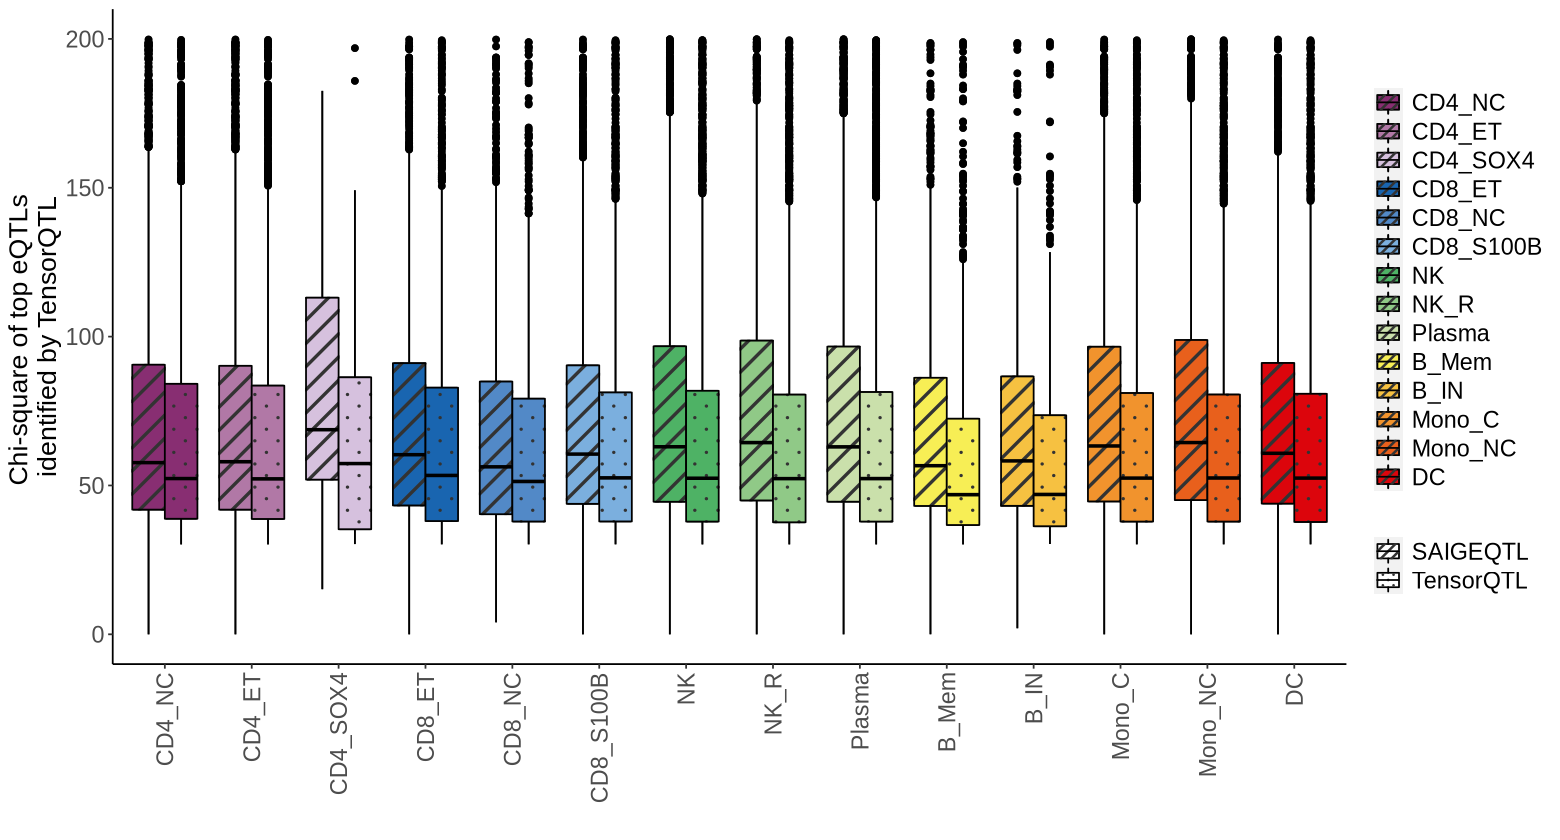

In [29]:
options(repr.plot.width = 13, repr.plot.height = 7)
myplot

In [30]:
fig_dir <- "/share/ScratchGeneral/anncuo/OneK1K/saige_eqtl/ms_figures/weis_figures/"
pdf(paste0(fig_dir,"chi_sq_comparison.pdf"), width=13, height=7)
myplot
dev.off()

Warning message:
“Removed 7627 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 7627 rows containing non-finite values (`stat_boxplot()`).”


png 
  2